
0: 384x640 5 surfers, 446.2ms
Speed: 2.2ms preprocess, 446.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


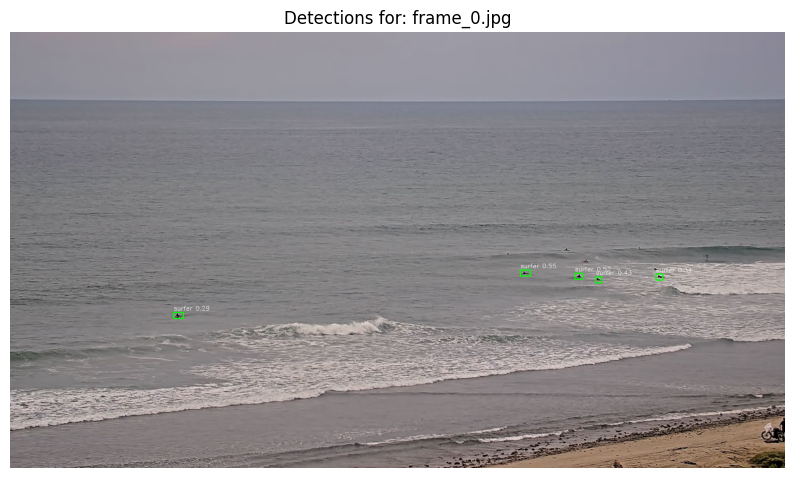


--- Data/test_frames/frame_0.jpg ---
surfer: 5

0: 384x640 4 surfers, 455.5ms
Speed: 1.5ms preprocess, 455.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


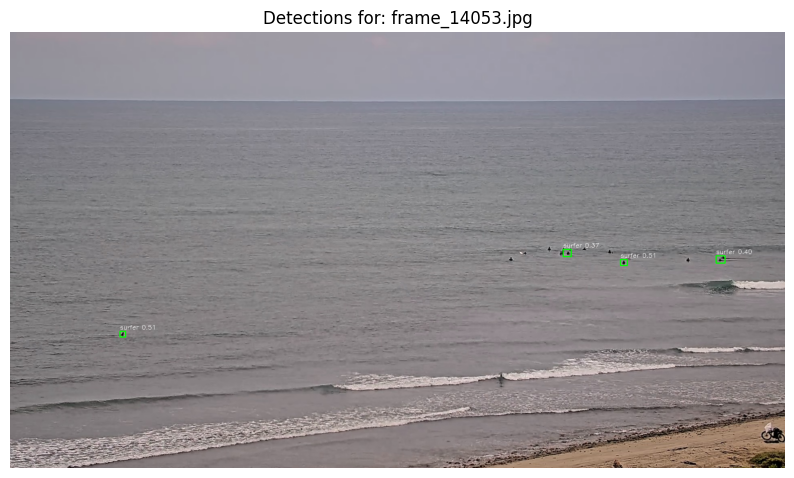


--- Data/test_frames/frame_14053.jpg ---
surfer: 4

0: 384x640 5 surfers, 393.0ms
Speed: 1.3ms preprocess, 393.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


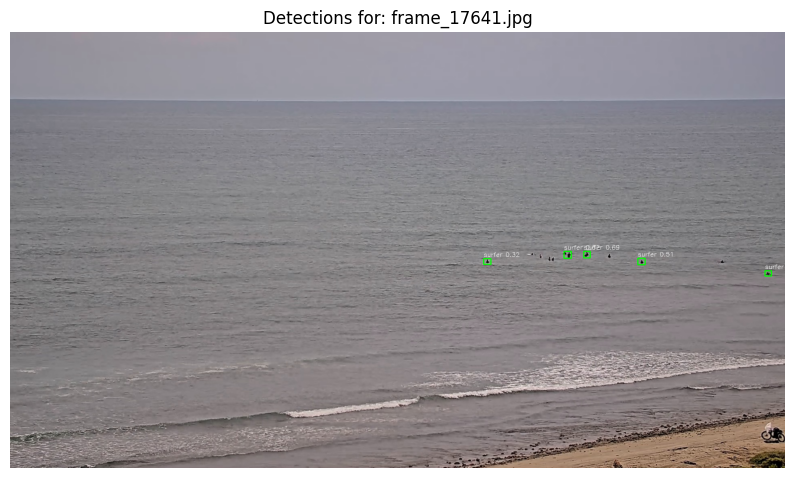


--- Data/test_frames/frame_17641.jpg ---
surfer: 5

0: 384x640 4 surfers, 355.8ms
Speed: 1.9ms preprocess, 355.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


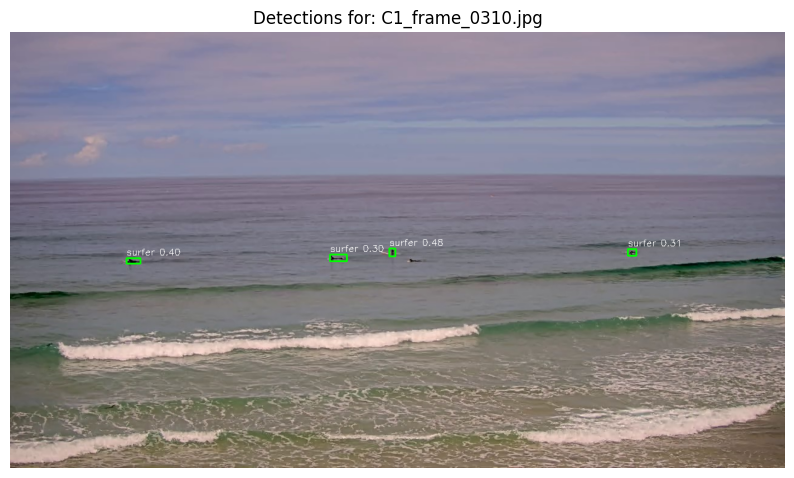


--- Data/test_frames/C1_frame_0310.jpg ---
surfer: 4

0: 384x640 3 surfers, 402.7ms
Speed: 1.7ms preprocess, 402.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


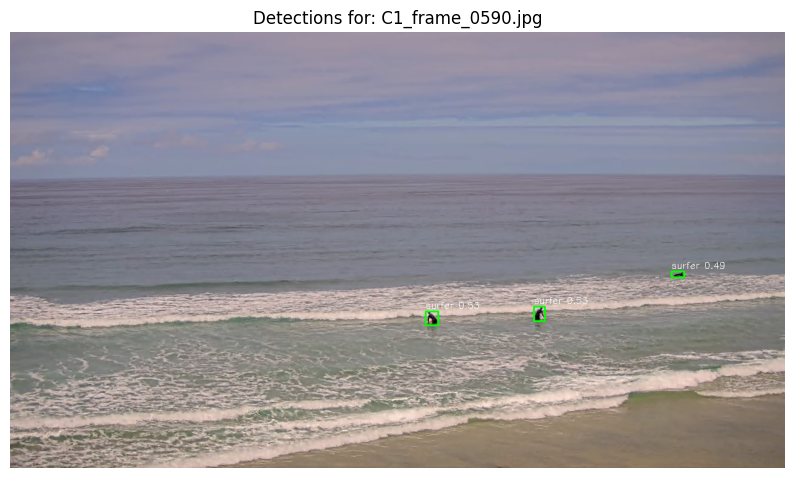


--- Data/test_frames/C1_frame_0590.jpg ---
surfer: 3

0: 384x640 8 surfers, 424.8ms
Speed: 1.5ms preprocess, 424.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


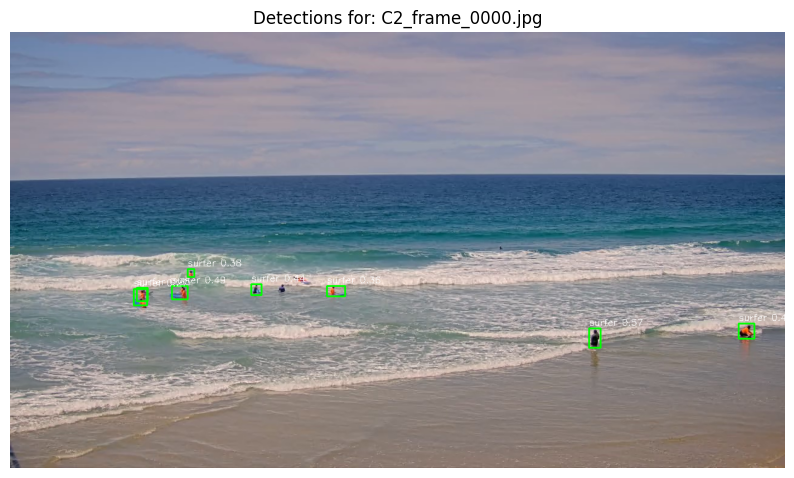


--- Data/test_frames/C2_frame_0000.jpg ---
surfer: 8

0: 384x640 11 surfers, 425.1ms
Speed: 1.1ms preprocess, 425.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


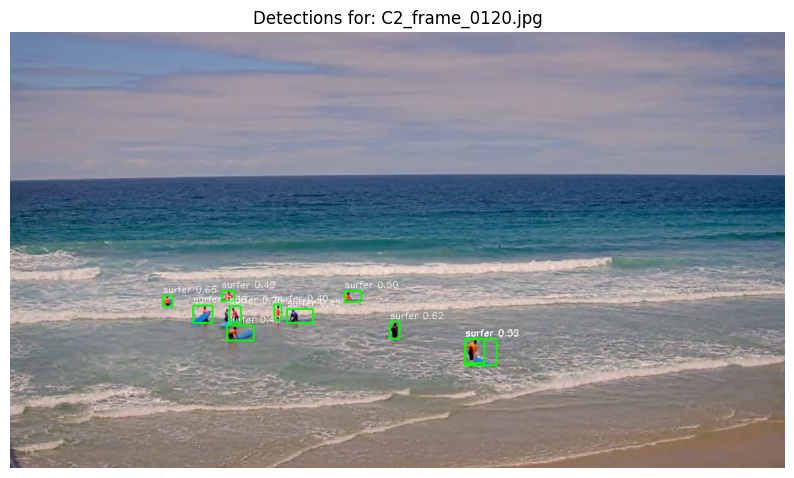


--- Data/test_frames/C2_frame_0120.jpg ---
surfer: 11


In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load the trained YOLO model
model = YOLO("final.pt")

# List of specific image paths
image_paths = [
    "Data/test_frames/frame_0.jpg",
    "Data/test_frames/frame_14053.jpg",
    "Data/test_frames/frame_17641.jpg",
    "Data/test_frames/C1_frame_0310.jpg",
    "Data/test_frames/C1_frame_0590.jpg",
    "Data/test_frames/C2_frame_0000.jpg",
    "Data/test_frames/C2_frame_0120.jpg"
]

# Loop through each image path
for image_path in image_paths:
    # Read image using OpenCV
    img = cv2.imread(image_path)

    # Run YOLO inference
    results = model(img)
    counts = {}

    # Draw boxes and annotate
    for box in results[0].boxes:
        xyxy = box.xyxy[0].cpu().numpy().astype(int)
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        class_name = model.names[cls_id]

        counts[class_name] = counts.get(class_name, 0) + 1

        label = f"{class_name} {conf:.2f}"
        cv2.rectangle(img, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
        cv2.putText(img, label, (xyxy[0], xyxy[1] - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Convert BGR (OpenCV) to RGB (matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Detections for: {image_path.split('/')[-1]}")
    plt.show()

    # Print count summary
    print(f"\n--- {image_path} ---")
    for cls, count in counts.items():
        print(f"{cls}: {count}")


In [5]:
# for app implementation it would look something like this as the return item from the JETSON:
image_path = "Data/test_frames/C2_frame_0120.jpg"
img = cv2.imread(image_path)

# Run inference
results = model(img)

# Count objects
counts = {}
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    class_name = model.names[cls_id]
    counts[class_name] = counts.get(class_name, 0) + 1

# Output result
print(counts)


0: 384x640 11 surfers, 431.2ms
Speed: 2.2ms preprocess, 431.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
{'surfer': 11}
